In [ ]:
!pip3 install signalframe

In [1]:
import signalframe as sf

In [2]:
# Load BED file with default column naming
bed_df = sf.load_bed("10k_regions.bed")
bed_df.head()

,chr,start,end
0,chr1,4296740,4297140
1,chr1,4430280,4430680
2,chr1,4654713,4655113
3,chr1,4915180,4915580
4,chr1,6932718,6933118


In [3]:
# Expand regions by 100 bp around the center
expanded_df = sf.expand_bed_regions(bed_df, method="center", expand_bp=1000)
expanded_df.head()

,chr,start,end
0,chr1,4295940,4297940
1,chr1,4429480,4431480
2,chr1,4653913,4655913
3,chr1,4914380,4916380
4,chr1,6931918,6933918


In [4]:
# Compute area under the curve (AUC) for each region
df_with_auc = sf.compute_signal("H3K27ac_tTreg.bw", expanded_df, method="auc")
df_with_auc.head()

Computing AUC: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 16123.62it/s]


,chr,start,end,auc
0,chr1,4295940,4297940,47.184521
1,chr1,4429480,4431480,71.352310
2,chr1,4653913,4655913,61.742790
3,chr1,4914380,4916380,127.359901
4,chr1,6931918,6933918,18.413496


In [5]:
# Compute AUC for each region in each file
df_with_multiple_aucs = sf.compute_signal_multi(["H3K27ac_tTreg.bw", "SRR7650872.bw"], expanded_df, method="auc")
df_with_multiple_aucs.head()

AUC: SRR7650872.bw: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 10258.32it/s]


,chr,start,end,H3K27ac_tTreg_auc,SRR7650872_auc
0,chr1,4295940,4297940,47.184521,1114.206299
1,chr1,4429480,4431480,71.352310,877.140808
2,chr1,4653913,4655913,61.742790,3461.583008
3,chr1,4914380,4916380,127.359901,1051.707153
4,chr1,6931918,6933918,18.413496,452.578949


In [6]:
# Log2 normalization with pseudocount
normalized_df = sf.normalize_signal(df_with_multiple_aucs, columns=["H3K27ac_tTreg_auc", "SRR7650872_auc"], method="log2", pseudocount=0.01)
normalized_df.head()

,chr,start,end,H3K27ac_tTreg_auc,SRR7650872_auc,H3K27ac_tTreg_auc_norm,SRR7650872_auc_norm
0,chr1,4295940,4297940,47.184521,1114.206299,5.560547,10.121814
1,chr1,4429480,4431480,71.352310,877.140808,6.157091,9.776681
2,chr1,4653913,4655913,61.742790,3461.583008,5.948432,11.757220
3,chr1,4914380,4916380,127.359901,1051.707153,6.992881,10.038531
4,chr1,6931918,6933918,18.413496,452.578949,4.203475,8.822058


In [7]:
# Compare ATAC signal to H3K27ac using fold change and log2FC
enrichment_df = sf.compare_tracks(df_with_multiple_aucs, reference="SRR7650872_auc", comparisons="H3K27ac_tTreg_auc", mode="log2FC")
enrichment_df.head()

,chr,start,end,H3K27ac_tTreg_auc,SRR7650872_auc,SRR7650872_auc_vs_H3K27ac_tTreg_auc_log2FC
0,chr1,4295940,4297940,47.184521,1114.206299,4.558634
1,chr1,4429480,4431480,71.352310,877.140808,3.617920
2,chr1,4653913,4655913,61.742790,3461.583008,5.806725
3,chr1,4914380,4916380,127.359901,1051.707153,3.044755
4,chr1,6931918,6933918,18.413496,452.578949,4.611839


In [8]:
# Sort by genomic coordinates
sorted_df = sf.sort_signal_df(enrichment_df, sort_by="SRR7650872_auc_vs_H3K27ac_tTreg_auc_log2FC", ascending=False)
sorted_df.head()

,chr,start,end,H3K27ac_tTreg_auc,SRR7650872_auc,SRR7650872_auc_vs_H3K27ac_tTreg_auc_log2FC
0,chr19,10398769,10400769,0.0,2882.712402,14.815189
1,chr1,156137327,156139327,0.0,2669.785156,14.704490
2,chrX,68910479,68912479,0.0,2624.095947,14.679588
3,chr17,49755493,49757493,0.0,1651.697754,14.011749
4,chr2,162234614,162236614,0.0,1393.727539,13.766765


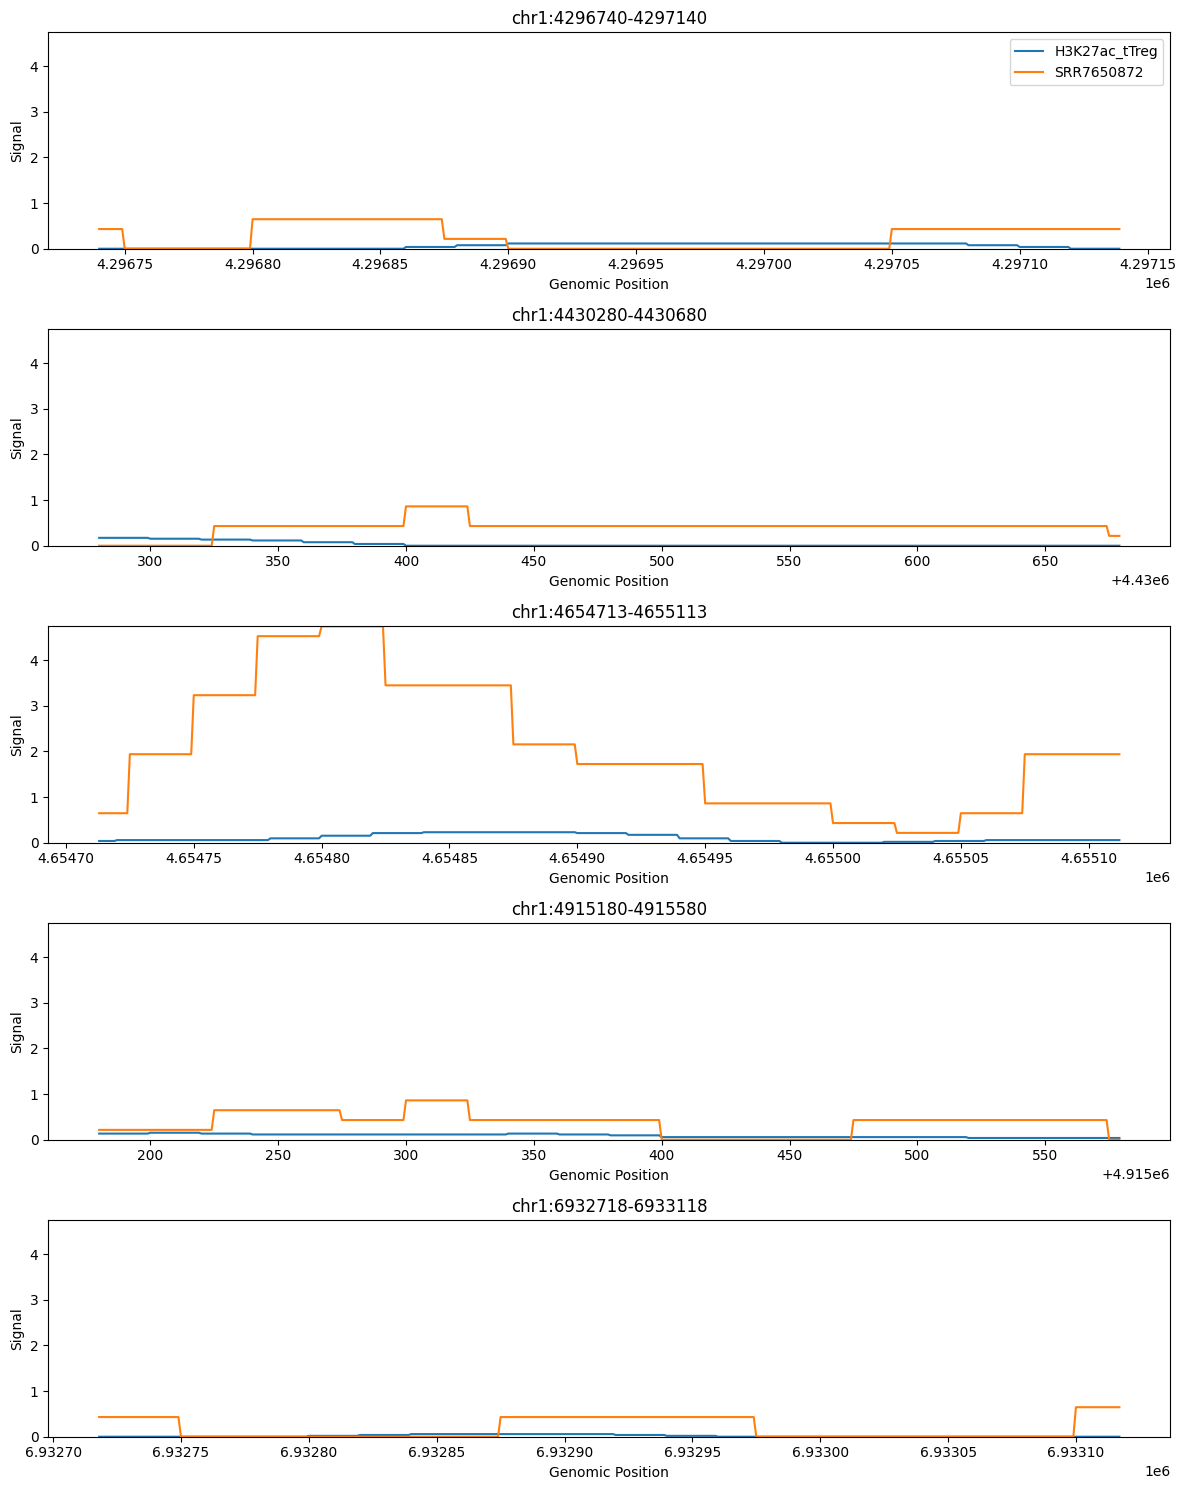

In [9]:
# Plot up to 5 regions with two BigWig tracks, shared y-axis turned off
sf.plot_signals_from_bed(
    bed_df,
    bigwig_paths=["H3K27ac_tTreg.bw", "SRR7650872.bw"],
    max_plots=5,
    shared_y=True,
    labels=["H3K27ac_tTreg", "SRR7650872"]
)